In [1]:
%matplotlib inline
#
# REQUIRED FOR THIS NOTEBOOK:
# pip3 install pyproj
#
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from pyproj import Proj

# Read data
data = pd.read_csv('resources/ufo-sightings.csv')
# Random subsampling
np.random.seed(42)
idx = np.random.choice(np.arange(len(data)), 10000, replace=False)
data = data.iloc[idx]
# Build an object to project latitude and longitude
p = Proj('+proj=merc +k_0=2')
# Project coordinates
x, y = p(data['longitude'].values, data['latitude'].values)
# Pack everything in a single array
X = np.vstack([x, y]).T
# Standardize
X /= X.std(axis=0)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<BarContainer object of 3 artists>

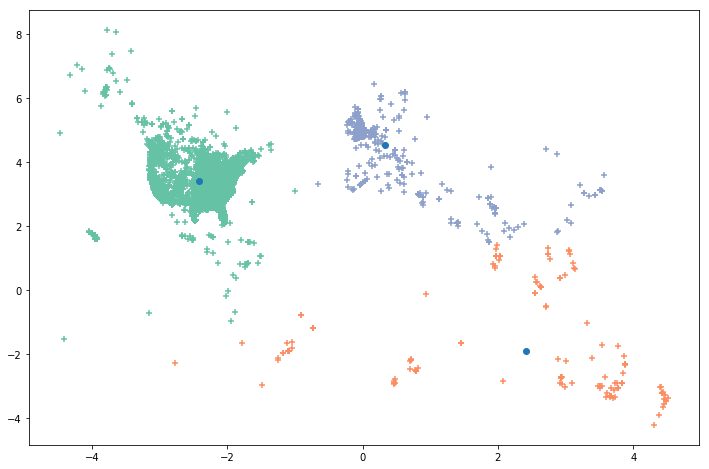

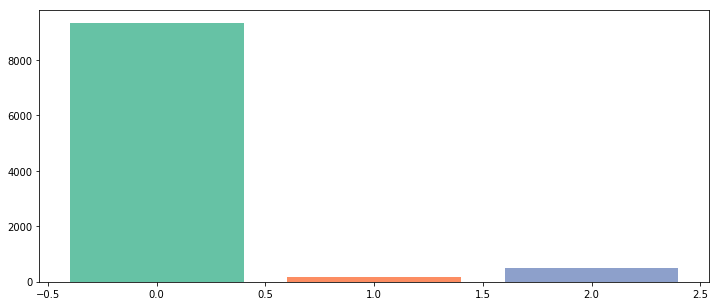

In [3]:
from sklearn.cluster import KMeans

# Build a clustering object
cls = KMeans(3)
# Train
cls.fit(X)
# Find cluster for each data point
y = cls.labels_

# Display results (scatter)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], marker='+', c=cm.Set2(y))
plt.scatter(cls.cluster_centers_[:, 0], cls.cluster_centers_[:, 1])
# Show cluster sizes
plt.figure(figsize=(12, 5))
plt.bar(np.unique(y), np.bincount(y), color=cm.Set2(np.unique(y)))

<BarContainer object of 55 artists>

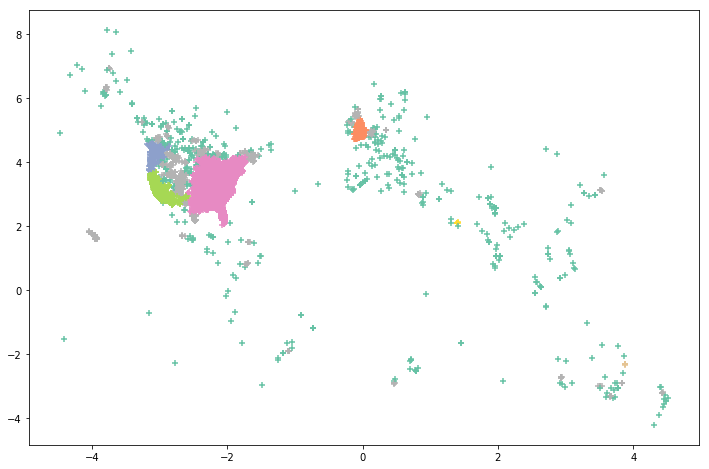

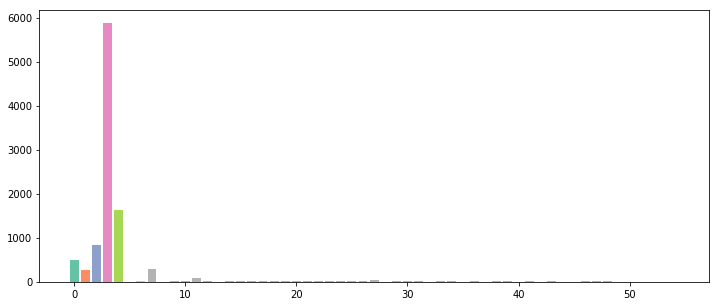

In [5]:
from sklearn.cluster import DBSCAN

# Build a clustering object
cls = DBSCAN(eps=0.05, min_samples=5)
# Train
cls.fit(X)
# Find cluster for each data point
y = cls.labels_+1

# Display results (scatter)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], marker='+', c=cm.Set2(y))
# Show cluster sizes
plt.figure(figsize=(12, 5))
plt.bar(np.unique(y), np.bincount(y), color=cm.Set2(np.unique(y)))